# 라이브러리 임포트

In [68]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, viewer, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

# numpy 배열 슬라이싱으로 영상 조작

[219 229 241]


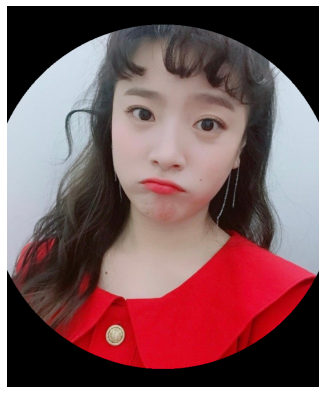

In [17]:
lena = imread("../images/Ben2.jpg")	# 영상 읽기(numpy ndarray)
print(lena[0, 40]) # [180 76 83]
# print(lena[10:13, 20:23,0:1]) 			# 행렬 범위 슬라이딩

lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena[mask, :] = 0

plt.figure(figsize=(7,7))
plt.imshow(lena), plt.axis('off')
plt.show()

[219 229 241]


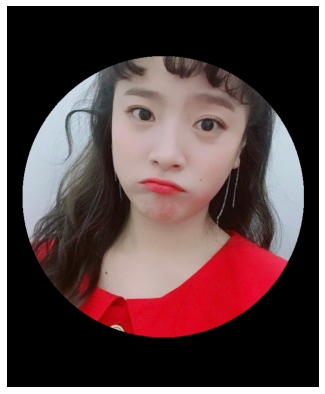

In [28]:
lena = imread("../images/Ben2.jpg")	# 영상 읽기(numpy ndarray)
print(lena[0, 40]) # [180 76 83]
# print(lena[10:13, 20:23,0:1]) 			# 행렬 범위 슬라이딩

lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 6 # 숫자 바꾸면 마스크 크기가 달라짐
lena[mask, :] = 0

plt.figure(figsize=(7,7))
plt.imshow(lena), plt.axis('off')
plt.show()

# 간단한 영상 모핑 - 교차 디졸브를 사용하는 두 영상의 알파 블렌딩

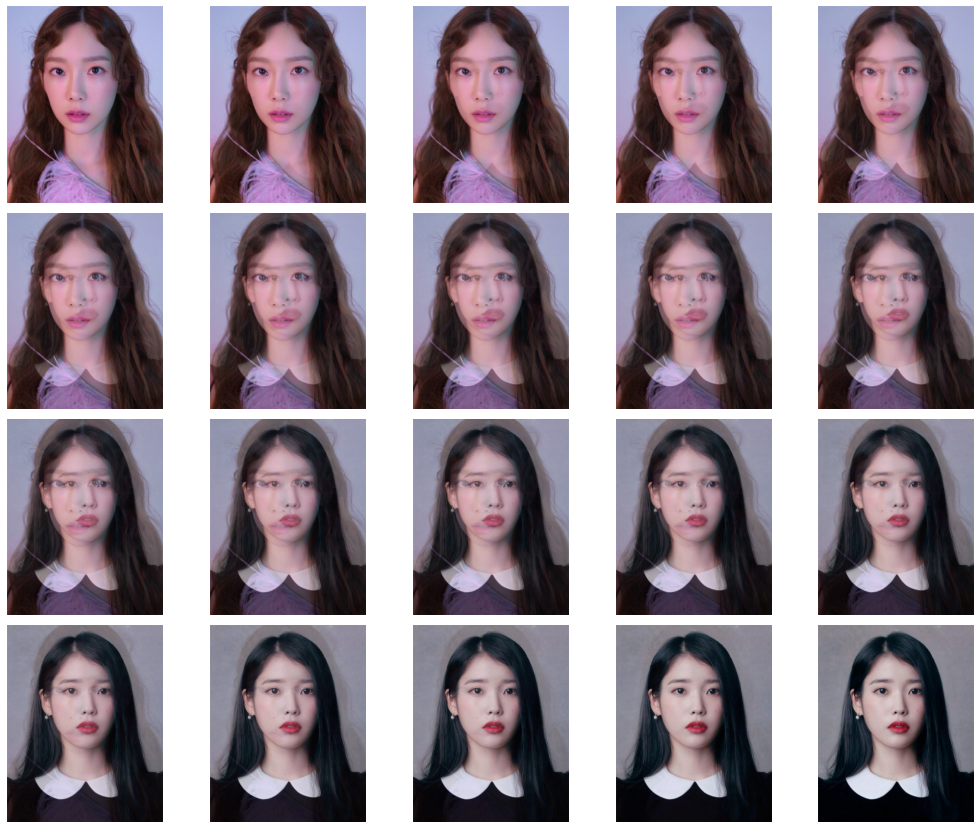

In [30]:
im1 = mpimg.imread("../images/teayeon2_1.jpg") / 255  		# RGB 값을 [0,1]로 조정
im2 = mpimg.imread("../images/IU_1.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0, 1, 20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# PIL을 이용한 영상 조작

283 359 RGB JPEG


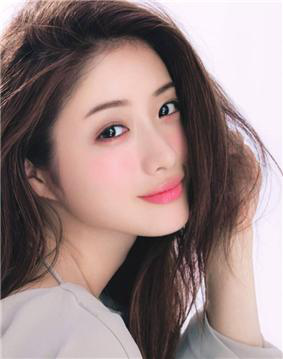

In [55]:
im = Image.open("../images/Ishihara.jpg") 		 # 영상 열기, 경로 주의
print(im.width, im.height, im.mode, im.format) 	 # 영상 정보 출력 -486 362 RGB PNG

im

# 영상 자르기

283 359 RGB JPEG


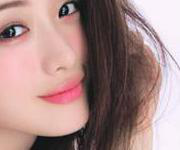

In [64]:
im = Image.open("../images/Ishihara.jpg")		# 영상 열기, 경로 주의
print(im.width, im.height, im.mode, im.format) # 영상 정보 출력 - 486 362 RGB PNG

im_c = im.crop((100,100,280,250))		# 사각형 정보(left, top, right, bottom)로 영상 절단
#im_c.show() 		 		 			# 윈도우의 사진보기 프로그램에 표시
im_c.save('../images/Ishihara_crop.jpg')

img1 = Image.open("../images/Ishihara_crop.jpg")
img1

# 영상 크기 조정 - 확대

In [65]:
im = Image.open("../images/Ishihara.jpg")
print(im.width, im.height)		  # 107 105
#im.show()

283 359


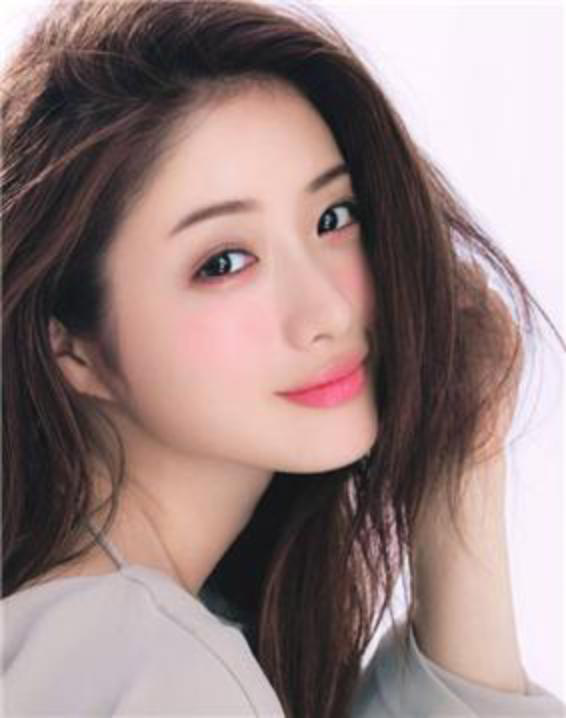

In [66]:
im_large = im.resize((im.width*2, im.height*2), Image.BILINEAR) # 양선형 보간
#im_large.show()
im_large.save('../images/Ishihara_large.jpg')

img2 = Image.open("../images/Ishihara_large.jpg")
img2

# 크기 변경 - 축소

In [52]:
im = Image.open("../images/Ishihara.jpg")
print(im.width, im.height) 		 # 720 540
#im.show()

360 360


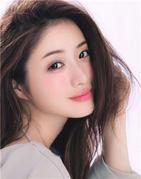

In [69]:
im_small = im.resize((im.width//2, im.height//2), Image.ANTIALIAS)
#im_small.show()
im_small.save('../images/Ishihara_small.jpg')

img3 = Image.open("../images/Ishihara_small.jpg")
img3

# 영상 반전

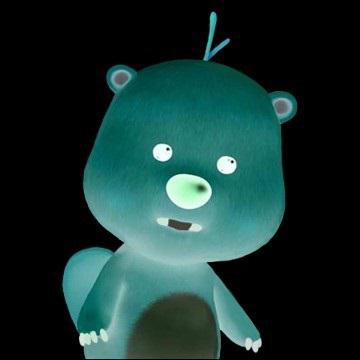

In [12]:
im = Image.open("../images/luffy.jpg")
im_t = im.point(lambda x: 255 - x)
im_t.save('../images/luffy_lambda.jpg')

img4 = Image.open("../images/luffy_lambda.jpg")
img4

# 영상을 명암도로 변환

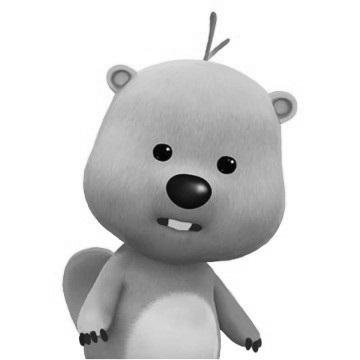

In [15]:
im_g = im.convert('L') # 컬러 영상 --> 명암도 영상
im_g.save('../images/luffy_g.jpg')

img5 = Image.open("../images/luffy_g.jpg")
img5

# 로그 변환

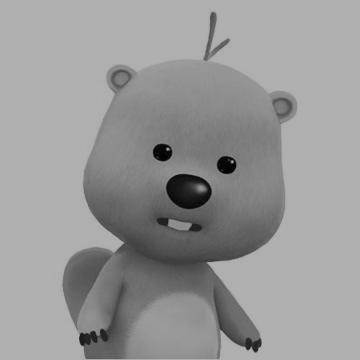

In [16]:
im_g_point = im_g.point(lambda x: 255*np.log(1+x/255))

im_g_point.save('../images/luffy_g_point.jpg')

img6 = Image.open("../images/luffy_g_point.jpg")
img6

# 파워-로우 변환

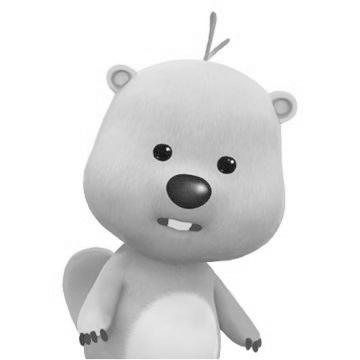

In [17]:
im_g_power = im_g.point(lambda x: 255*(x/255)**0.6)

im_g_power.save('../images/luffy_g_power.jpg')

img7 = Image.open("../images/luffy_g_power.jpg")
img7

# 기하학적 변환 - 영상 반사

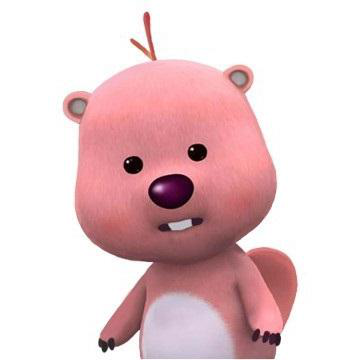

In [19]:
im_transpose = im.transpose(Image.FLIP_LEFT_RIGHT) # 수직 축을 기준으로 반사

im_transpose.save('../images/luffy_transpose.jpg')

img8 = Image.open("../images/luffy_transpose.jpg")
img8

# 영상 회전

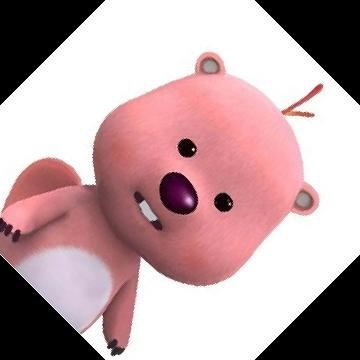

In [21]:
im_45 = im.rotate(-45) # -45도 영상 회전

im_45.save('../images/luffy_45.jpg')

img9 = Image.open("../images/luffy_45.jpg")
img9

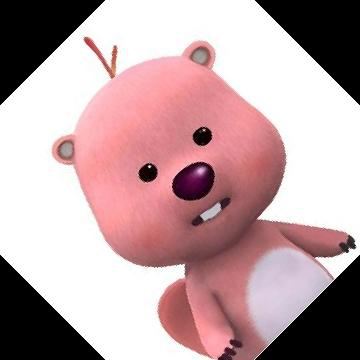

In [22]:
im_45 = im.rotate(45) # 45도 영상 회전

im_45.save('../images/luffy_45.jpg')

img9 = Image.open("../images/luffy_45.jpg")
img9

# 영상에 어파인 변환 적용

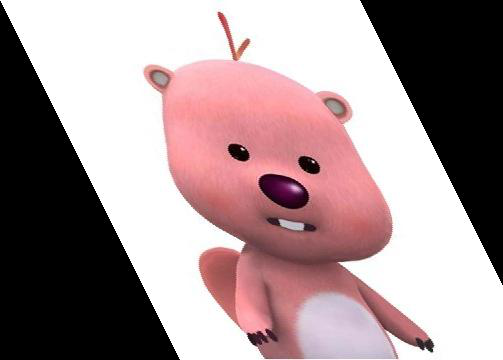

In [24]:
size = (int(1.4*im.width), im.height)
im_trans = im.transform(size, Image.AFFINE, data=(1,-0.5,0,0,1,0)) # shear(전단)

im_trans.save('../images/luffy_trans.jpg')

img10 = Image.open("../images/luffy_trans.jpg")
img10

# 원근 변환

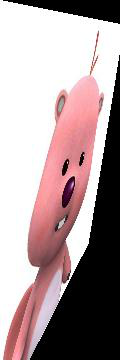

In [26]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
size = (im.width//3, im.height)
im1 = im.transform(size, Image.PERSPECTIVE, params, Image.BICUBIC)
im1.save('../images/luffy_1.jpg')

img11 = Image.open("../images/luffy_1.jpg")
img11

# 영상의 화소 값 변경 - 소금 후추 잡음 추가

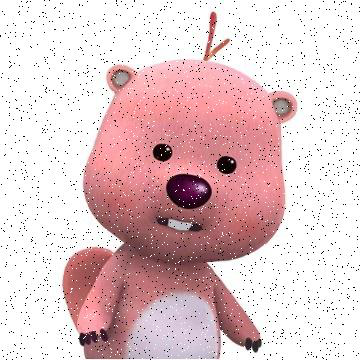

In [28]:
im1 = im.copy()  					# 복제를 통해 원본 영상 유지
n = 5000  							# 영상내에 5,000개 랜덤 좌표 선택
x = np.random.randint(0, im.width, n)
y = np.random.randint(0, im.height,n)

for (x,y) in zip(x,y):
    new_pix = (0,0,0) if np.random.rand() < 0.5 else (255,255,255)
    im1.putpixel((x, y), new_pix )	# 소금 후추 잡음 추가
im1.save('../images/luffy_2.jpg')

img12 = Image.open("../images/luffy_2.jpg")
img12

# 영상에 그리기

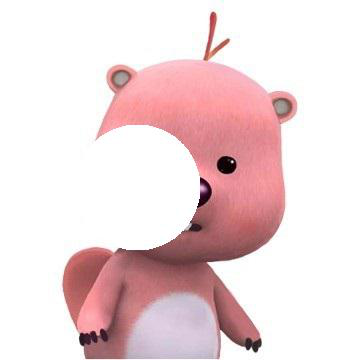

In [42]:
im = Image.open("../images/luffy.jpg")
draw = ImageDraw.Draw(im)
draw.ellipse((75, 125, 200, 250), fill=(255,255,255,128))
del draw
im.save('../images/luffy_3.jpg')

img13 = Image.open("../images/luffy_3.jpg")
img13

# 영상에 글자 쓰기

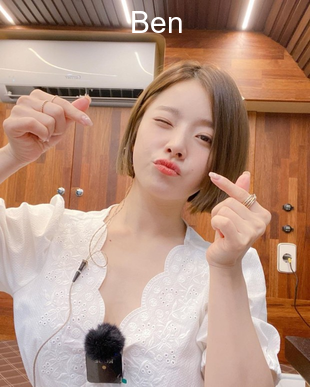

In [69]:
im = Image.open("../images/Ben3.png")
im = im.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 30) # use a truetype font
draw.text((10, 5), "               Ben", font=font)
del draw
im.save('../images/Ben3_font.png')

img14 = Image.open("../images/Ben3_font.png")
img14

# RGB 채널 분리

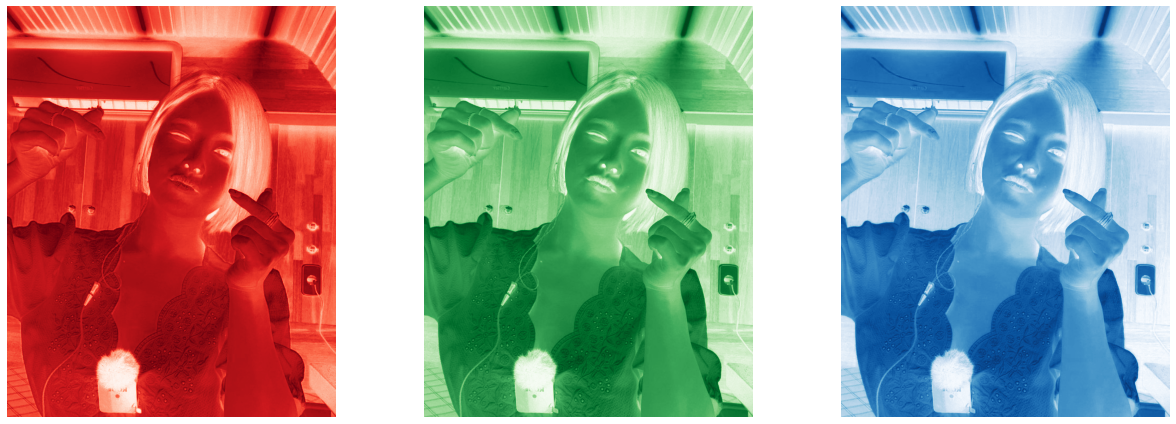

In [74]:
im = Image.open("../images/Ben3.jpg")
ch_r, ch_g, ch_b = im.split()	# 3개 채널(Red, Green, Blue) 분리
# matplotlib를 사용하여 각 채널 영상 표시
plt.figure(figsize=(18,6))
plt.subplot(1,3,1), plt.imshow(ch_r, cmap='Reds'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(ch_g, cmap='Greens'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(ch_b, cmap='Blues'), plt.axis('off')
plt.tight_layout()
plt.show()

# 다중 채널 결합

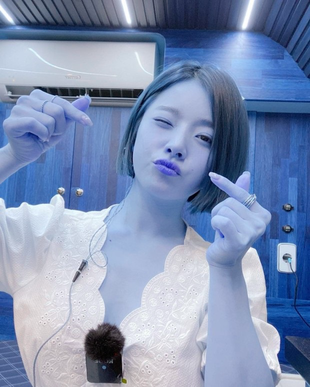

In [77]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # red, blue 채널 바꿔 채널 합성
im = im.resize((im.width//2, im.height//2), Image.ANTIALIAS) # 이미지 축소
im.save('../images/Ben3_merge.png')

img15 = Image.open("../images/Ben3_merge.png")
img15

# α-블렌딩

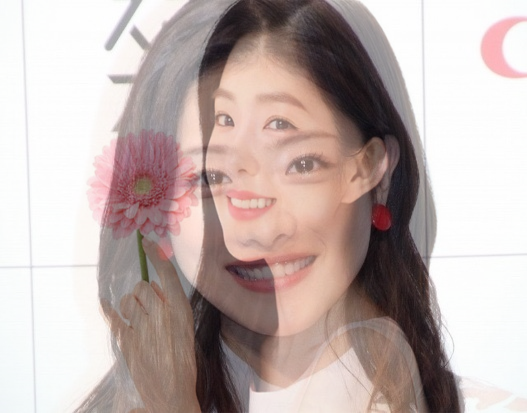

In [80]:
im1 = Image.open("../images/Ishihara2.png")
im2 = Image.open("../images/Irene.png") 		# 453 340 1280 960 RGBA

im1 = im1.convert('RGBA') 					# 두 영상 컬러 모드 다름, 같은 모드 변경
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) # 두 영상 크기 같게함
im = Image.blend(im1, im2, alpha=0.5)
im.save('../images/blending.png')

img16 = Image.open("../images/blending.png")
img16

# 두 영상 겹치기

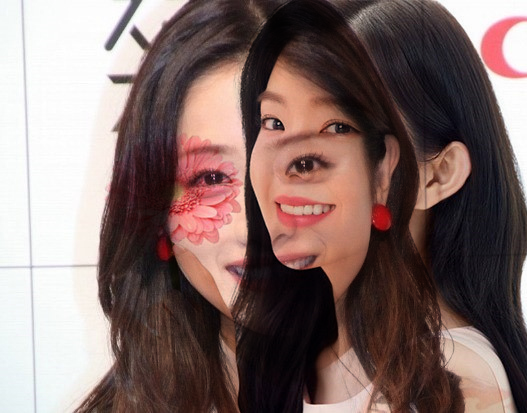

In [83]:
im1 = Image.open("../images/Ishihara2.png")
im2 = Image.open("../images/Irene.png")
#im2 = im2.convert('RGB').resize((im1.width,im1.height))
im = multiply(im1, im2)
im.save('../images/multiply.png')

img17 = Image.open("../images/multiply.png")
img17

# 두 영상 더하기

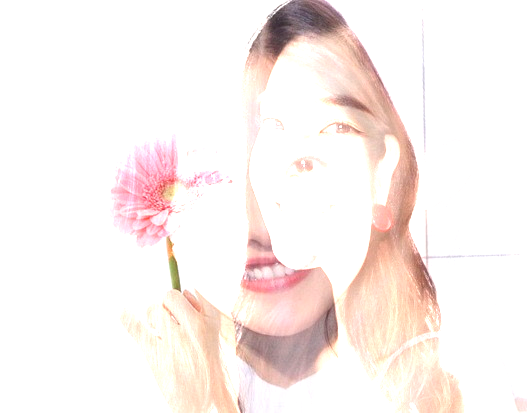

In [84]:
im1 = Image.open("../images/Ishihara2.png")
im2 = Image.open("../images/Irene.png")
im = add(im1, im2)

im.save('../images/add.png')

img18 = Image.open("../images/add.png")
img18